<a href="https://colab.research.google.com/github/JeelCueva/modelos-arch-garch/blob/main/Practica_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Práctica 1: 11 de julio del 2025 ##

### 1. CARGAR LAS LIBRERIAS NECESARIAS

Análisis de Valores Faltantes:
status       0
seniority    0
home         0
time         0
age          0
marital      0
records      0
job          0
expenses     0
income       0
assets       0
debt         0
amount       0
price        0
dtype: int64

Estadísticas Descriptivas de Variables Numéricas:


,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.000000,4455.000000,4455.000000,4455.000000,4.455000e+03,4.455000e+03,4.455000e+03,4455.000000,4455.000000
mean,7.987205,46.441751,37.077666,55.568799,7.633170e+05,1.060341e+06,4.043820e+05,1039.021773,14.628756
std,8.173444,14.655225,10.984856,19.515878,8.703625e+06,1.021757e+07,6.344253e+06,474.543007,6.280899
min,0.000000,6.000000,18.000000,35.000000,0.000000e+00,0.000000e+00,0.000000e+00,100.000000,1.050000
25%,2.000000,36.000000,28.000000,35.000000,8.000000e+01,0.000000e+00,0.000000e+00,700.000000,11.175000
50%,5.000000,48.000000,36.000000,51.000000,1.200000e+02,3.500000e+03,0.000000e+00,1000.000000,14.000000
75%,12.000000,60.000000,45.000000,72.000000,1.660000e+02,6.000000e+03,0.000000e+00,1300.000000,16.920000
max,48.000000,72.000000,68.000000,180.000000,1.000000e+08,1.000000e+08,1.000000e+08,5000.000000,111.400000



Matriz de Correlación de Variables Numéricas:


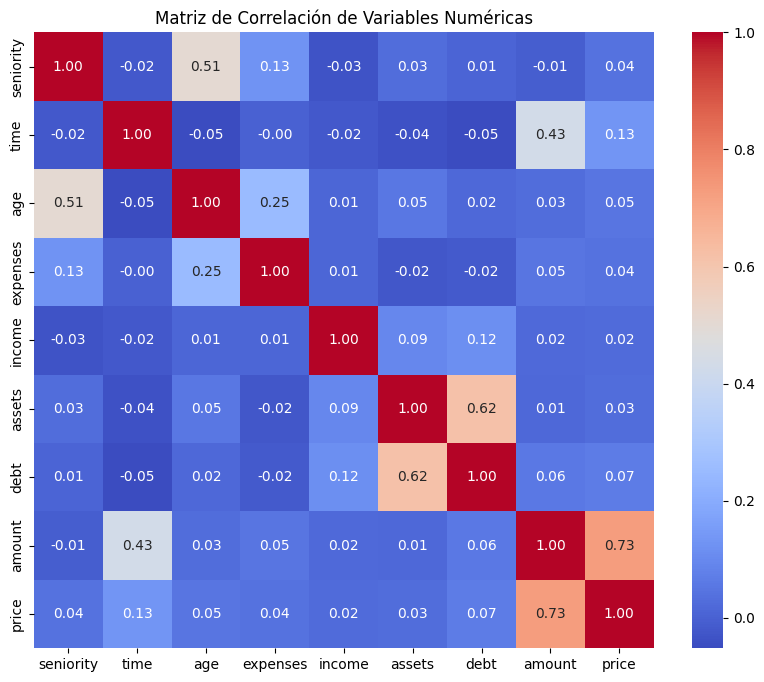

In [72]:
# Análisis de valores faltantes (re-verificación)
print("Análisis de Valores Faltantes:")
print(df.isnull().sum())

# Estadísticas descriptivas de variables numéricas
print("\nEstadísticas Descriptivas de Variables Numéricas:")
display(df.describe())

# Matriz de correlación de variables numéricas
print("\nMatriz de Correlación de Variables Numéricas:")
num_cols = df.select_dtypes(include=np.number).columns
correlation_matrix = df[num_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

# Consideraciones sobre Outliers y Escalado:
# Aunque no se implementará el código aquí, en un análisis exhaustivo se debería:
# - Identificar y analizar la proporción de outliers en cada variable numérica (por ejemplo, usando box plots o métodos estadísticos).
# - Decidir una estrategia para manejar outliers (eliminación, transformación, etc.).
# - Evaluar si el escalado de variables numéricas es necesario para los modelos a utilizar (modelos basados en distancia como SVM o K-NN suelen requerirlo, mientras que modelos basados en árboles como Random Forest y Gradient Boosting son menos sensibles).

# Consideraciones sobre Codificación de Variables Categóricas:
# La codificación Label Encoding fue utilizada en este cuaderno por simplicidad.
# Para un análisis más avanzado en credit scoring, se recomienda explorar:
# - Codificación por Peso de Evidencia (WOE), que transforma las categorías basándose en su relación con la variable objetivo.

In [45]:
!pip install pandas numpy matplotlib seaborn scikit-learn

# ### 1. CARGAR BASE DE DATOS DESDE DRIVE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report, f1_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

### Cargar Base de Datos desde Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('/content/CreditRisk (2) (1).csv')
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,8.46
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,16.58
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,29.85
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,13.25
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,9.10


# Realizar con el dataset CreditRisk.csv, las siguientes fases de entrenamiento de un modelo de credit scoring:
* Analisis Exploratorio de variables
* Ingenieria de Características/variables
* Selección de Características/variables
* Modelo Logístico


# 1. Análisis Exploratorio de Variables (EDA)
* Cargamos los datos, revisamos las primeras filas, valores faltantes y visualizamos la distribución de variables numéricas y categóricas.


El código proporcionado realiza las primeras etapas de un proyecto de modelado de riesgo crediticio utilizando Python y Google Colab. A continuación, se describe el proceso paso a paso:

1.  **Configuración Inicial y Montaje de Google Drive:**
    *   Se importan las librerías necesarias para manipulación de datos (`pandas`, `numpy`), visualización (`matplotlib.pyplot`, `seaborn`), modelado (`sklearn`), y montaje de Google Drive.
    *   Se montan las carpetas de Google Drive en el entorno de Colab para poder acceder a archivos almacenados allí. Esto se hace con `drive.mount('/content/drive')`.

2.  **Carga de la Base de Datos:**
    *   Se carga el archivo `CreditRisk.csv` en un DataFrame de pandas llamado `df`. Se especifica la codificación `ascii` al cargar el archivo.
    *   Aunque el código muestra dos intentos de cargar el archivo, la segunda carga (`df = pd.read_csv('CreditRisk.csv', encoding='ascii')`) sobrescribe el resultado de la primera. Asumiendo que el archivo `CreditRisk.csv` se encuentra en la raíz del entorno de Colab o en la ruta donde se ejecuta el código, esta línea cargará el dataset. Si el archivo estuviera en Drive, la primera línea (`df=pd.read_csv('/content/CreditRisk.csv')`) sería la correcta después de montar Drive.
    *   Se muestran las primeras filas del DataFrame (`df.head()`) para tener una vista previa de los datos.

3.  **Análisis Exploratorio de Variables (EDA):**
    *   El objetivo de esta sección es comprender la estructura y distribución de los datos.
    *   **Identificación de Valores Faltantes:** Se calcula y se imprime la cantidad de valores nulos en cada columna del DataFrame (`df.isnull().sum()`). Esto es crucial para decidir cómo manejar los datos faltantes más adelante.
    *   **Análisis de Variables Numéricas:**
        *   Se identifican las columnas con tipos de datos numéricos (`int64`, `float64`).
        *   Se generan histogramas para cada una de estas columnas numéricas (`df[num_cols].hist(...)`). Los histogramas muestran la distribución de los valores para cada variable numérica.
        *   `plt.tight_layout()` ajusta automáticamente los subgráficos para que no se solapen.
        *   `plt.show()` muestra las figuras generadas.
    *   **Análisis de Variables Categóricas:**
        *   Se identifican las columnas con tipo de dato `object`, que generalmente representan variables categóricas.
        *   Se itera sobre cada columna categórica.
        *   Para cada columna, se crea un gráfico de barras utilizando `seaborn.countplot()` que muestra la frecuencia de cada categoría en esa variable.
        *   Se añade un título a cada gráfico indicando la variable que representa.
        *   Se muestra cada gráfico (`plt.show()`).

4.  **Ingeniería de Características (Introducción):**
    *   La descripción del código indica que esta sección se encargará de transformar la variable objetivo y codificar las variables categóricas.
    *   Sin embargo, el código proporcionado solo llega hasta el final de la sección de EDA y no incluye el código real para realizar la transformación de la variable objetivo o la codificación de las variables categóricas. La sección 2, tal como está escrita, solo describe lo que *se hará*, pero no contiene el código para hacerlo.



    status  seniority   home  time  age  marital records        job  expenses  \
0       ok          9   rent    60   30  married      no  freelance        73   
1       ok         17   rent    60   58    widow      no      fixed        48   
2  default         10  owner    36   46  married     yes  freelance        90   
3       ok          0   rent    60   24   single      no      fixed        63   
4       ok          0   rent    36   26   single      no      fixed        46   

   income  assets  debt  amount  price  
0     129       0     0     800   8.46  
1     131       0     0    1000  16.58  
2     200    3000     0    2000  29.85  
3     182    2500     0     900  13.25  
4     107       0     0     310   9.10  
status       0
seniority    0
home         0
time         0
age          0
marital      0
records      0
job          0
expenses     0
income       0
assets       0
debt         0
amount       0
price        0
dtype: int64


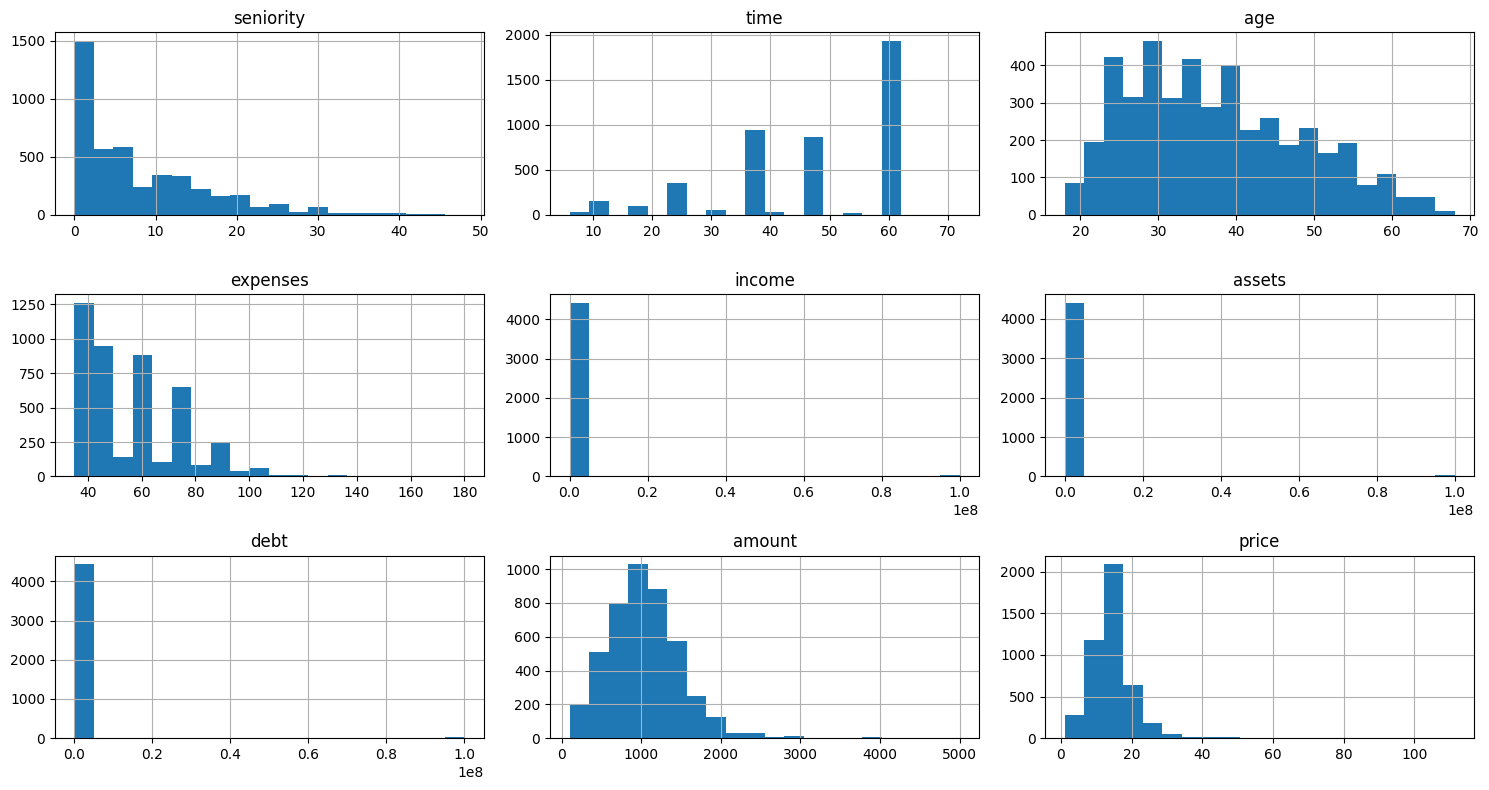

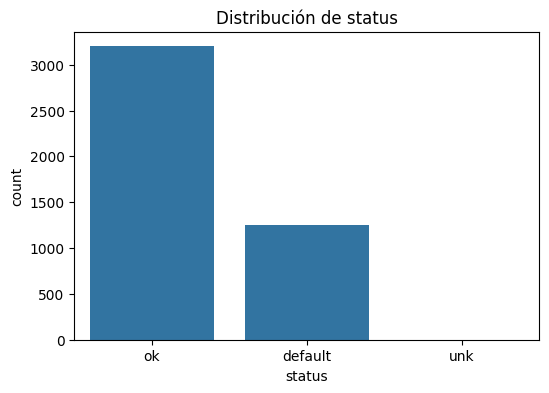

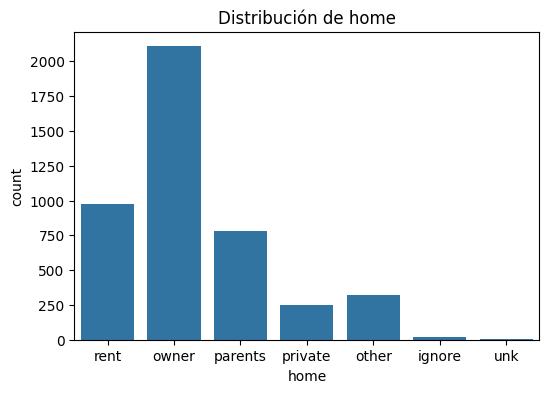

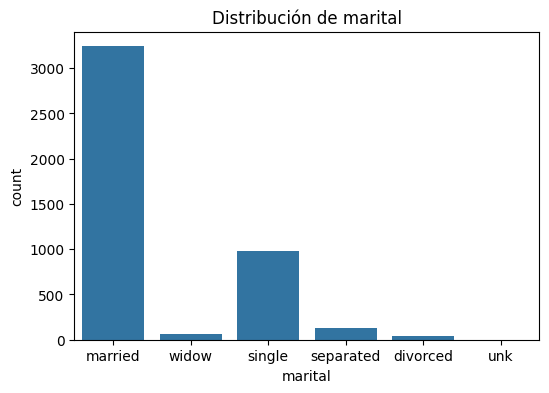

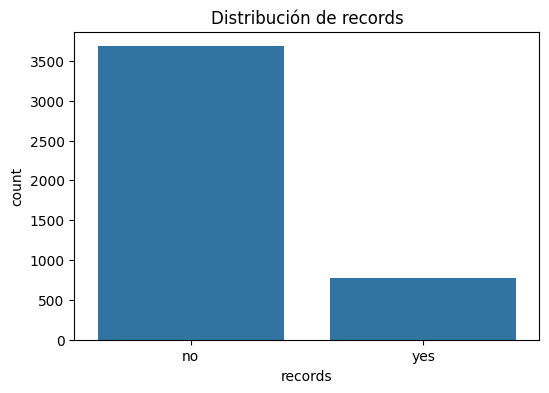

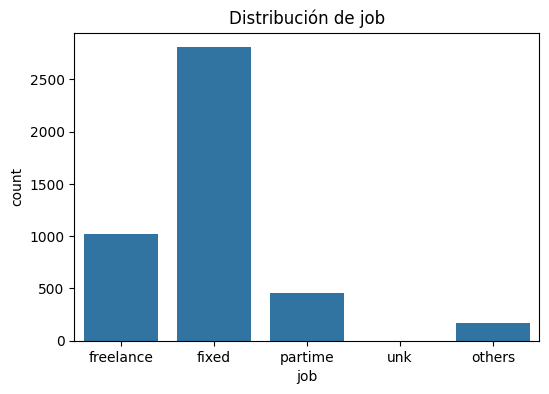

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df = pd.read_csv('/content/CreditRisk (2) (1).csv', encoding='ascii')

# Primeras filas y valores faltantes
print(df.head())
print(df.isnull().sum())

# Distribución de variables numéricas
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols].hist(bins=20, figsize=(15, 8))
plt.tight_layout()
plt.show()

# Distribución de variables categóricas
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df)
    plt.title('Distribución de ' + col)
    plt.show()

# 2. Ingeniería de Características
* Transformamos la variable objetivo y codificamos las variables categóricas.

In [54]:
from sklearn.preprocessing import LabelEncoder

# Copia del dataframe
df_model = df.copy()

# Codificar variable objetivo: 'status' (ok=0, default=1)
df_model['status'] = df_model['status'].map({'ok': 0, 'default': 1})

# Codificar variables categóricas
cat_cols = ['home', 'marital', 'records', 'job']
for col in cat_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])

print(df_model.head())

   status  seniority  home  time  age  marital  records  job  expenses  \
0     0.0          9     5    60   30        1        0    1        73   
1     0.0         17     5    60   58        5        0    0        48   
2     1.0         10     2    36   46        1        1    1        90   
3     0.0          0     5    60   24        3        0    0        63   
4     0.0          0     5    36   26        3        0    0        46   

   income  assets  debt  amount  price  
0     129       0     0     800   8.46  
1     131       0     0    1000  16.58  
2     200    3000     0    2000  29.85  
3     182    2500     0     900  13.25  
4     107       0     0     310   9.10  


# 3. Selección de Características y Entrenamiento del Modelo
* Seleccionamos variables relevantes, limpiamos datos faltantes y entrenamos el modelo logístico.

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Selección de variables
features = ['seniority', 'home', 'time', 'age', 'marital', 'records', 'job', 'expenses', 'income', 'assets', 'debt', 'amount']

# Eliminar filas con valores faltantes
clean_df = df_model.dropna(subset=['status'] + features)

# División en train/test
X = clean_df[features]
y = clean_df['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Entrenamiento del modelo logístico
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

# 4. Evaluación del Modelo y Métricas
Calculamos ROC-AUC, GINI, seleccionamos el umbral óptimo y mostramos métricas de clasificación.



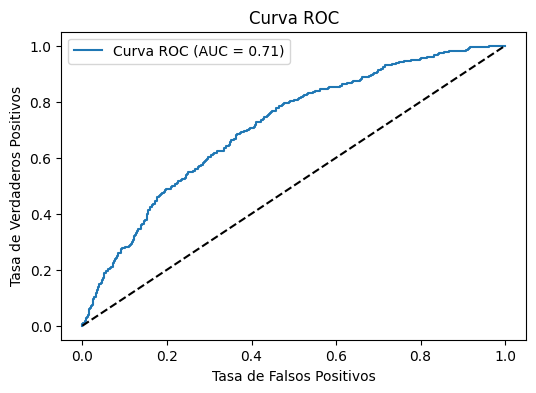

    ROC-AUC      GINI  Umbral Óptimo  Precisión    Recall  Puntuación F1
0  0.711011  0.422023       0.287884   0.398111  0.784574       0.528201


In [97]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_fscore_support, precision_recall_curve
import numpy as np

# Predicciones de probabilidad
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

# ROC-AUC y GINI
roc_auc = roc_auc_score(y_test, y_pred_proba)
gini = 2 * roc_auc - 1

# Curva ROC
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label='Curva ROC (AUC = %.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

# Umbral óptimo por F1 Score
prec, rec, thresholds_pr = precision_recall_curve(y_test, y_pred_proba)
f1_scores = 2 * (prec * rec) / (prec + rec + 1e-8)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds_pr[optimal_idx]

# Predicciones finales
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)

# Métricas de clasificación
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_optimal, average='binary')

# Resultados
results = pd.DataFrame({
    'ROC-AUC': [roc_auc],
    'GINI': [gini],
    'Umbral Óptimo': [optimal_threshold],
    'Precisión': [precision],
    'Recall': [recall],
    'Puntuación F1': [f1]
})
print(results)

# 5. Importancia de Variables y Visualizaciones Clave
* Mostramos la importancia de las variables, la distribución de probabilidades y la matriz de confusión.



/tmp/ipython-input-2336435683.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importancia (coeficiente)', y='Variable', data=feature_importance, palette='viridis')


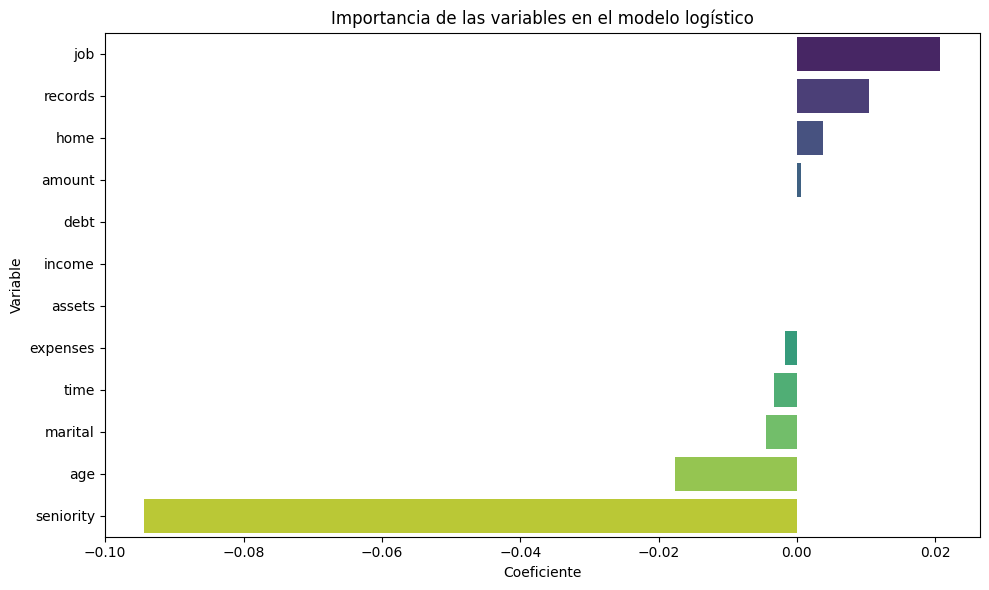

     Variable  Importancia (coeficiente)
6         job               2.072323e-02
5     records               1.037133e-02
1        home               3.716351e-03
11     amount               5.430100e-04
10       debt               2.034728e-08
8      income               1.073072e-08
9      assets               4.943070e-09
7    expenses              -1.657988e-03
2        time              -3.269453e-03
4     marital              -4.406761e-03
3         age              -1.760263e-02
0   seniority              -9.432248e-02


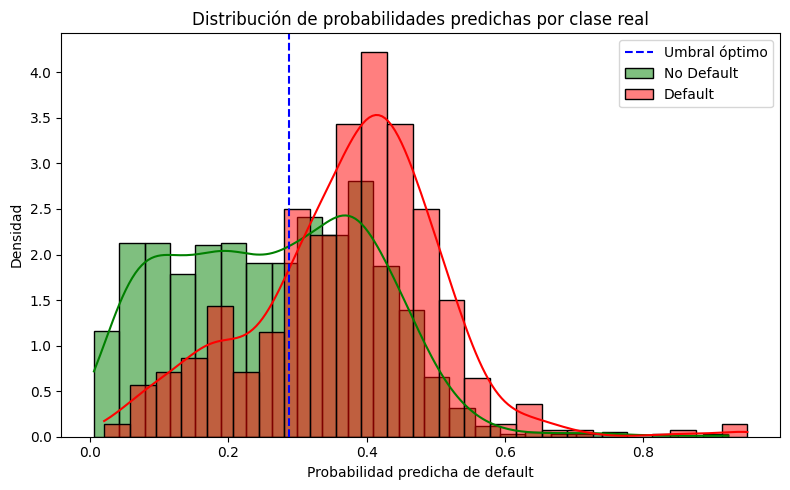

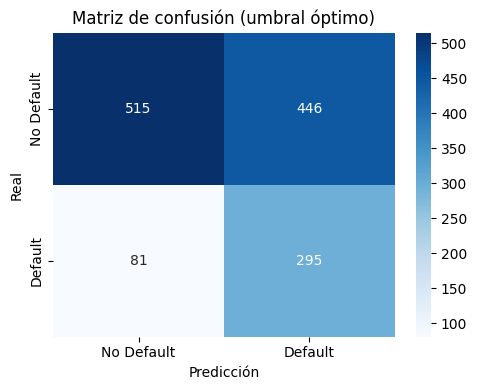

In [98]:
# Importancia de variables
coefs = logreg.coef_[0]
feature_importance = pd.DataFrame({'Variable': features, 'Importancia (coeficiente)': coefs})
feature_importance = feature_importance.sort_values(by='Importancia (coeficiente)', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia (coeficiente)', y='Variable', data=feature_importance, palette='viridis')
plt.title('Importancia de las variables en el modelo logístico')
plt.xlabel('Coeficiente')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()
print(feature_importance)

# Distribución de probabilidades predichas
plt.figure(figsize=(8, 5))
sns.histplot(y_pred_proba[y_test == 0], color='green', label='No Default', kde=True, stat='density', bins=25)
sns.histplot(y_pred_proba[y_test == 1], color='red', label='Default', kde=True, stat='density', bins=25)
plt.axvline(optimal_threshold, color='blue', linestyle='--', label='Umbral óptimo')
plt.title('Distribución de probabilidades predichas por clase real')
plt.xlabel('Probabilidad predicha de default')
plt.ylabel('Densidad')
plt.legend()
plt.tight_layout()
plt.show()

# Matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_optimal)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de confusión (umbral óptimo)')
plt.tight_layout()
plt.show()

## 2DA PRACTICA: CON FECHA 03 DE AGOSTO DE 2025

Entrenar al menos dos modelos alternativos ML, mandatorio los vistos en clase: Random Forest y Gradient Boosting (es opcional, mas no mandatorio que evalúen otros algoritmos). Se pide:
Realizar el tuneo de hiperparámetros en cada uno de estos algoritmos
Entrenar los modelos con los mejores hiperpámetros obtenidos
Obtener las métricas de GINI/ROC, Precision, Recall, F1 Score basado en un punto de corte óptimo para el ejercicio.
Probar técnicas de balanceo de datos (respecto a la variable objetivo) y medir sus resultados basado en las métricas anteriores
Comparación final de estos modelos y a su vez el modelo logístico obtenido en la práctica 1, y tomar una decisión sobre el modelo seleccionado. Sustentar.



## Implementar Balanceo de Datos
Aplicaremos una técnica de balanceo de datos al conjunto de entrenamiento para abordar el desbalance de clases.

In [59]:
from imblearn.over_sampling import SMOTE

# Aplicar SMOTE solo al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print(f'Shape of X_train before balancing: {X_train.shape}')
print(f'Shape of y_train before balancing: {y_train.shape}')
print(f'Shape of X_train after balancing: {X_train_balanced.shape}')
print(f'Shape of y_train after balancing: {y_train_balanced.shape}')
print(f'Class distribution in y_train after balancing:\n{y_train_balanced.value_counts()}')

Shape of X_train before balancing: (3117, 12)
Shape of y_train before balancing: (3117,)
Shape of X_train after balancing: (4478, 12)
Shape of y_train after balancing: (4478,)
Class distribution in y_train after balancing:
status
1.0    2239
0.0    2239
Name: count, dtype: int64


## 3. Modelo Random Forest
Entrenaremos un modelo Random Forest, realizando ajuste de hiperparámetros con búsqueda en cuadrícula y validación cruzada.

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Definir la cuadrícula de hiperparámetros para Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inicializar el modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Inicializar GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf,
                              scoring='roc_auc', cv=5, n_jobs=-1)

# Realizar la búsqueda en cuadrícula en los datos balanceados
grid_search_rf.fit(X_train_balanced, y_train_balanced)

# Mostrar los mejores hiperparámetros y la mejor puntuación
print(f'Mejores hiperparámetros para Random Forest: {grid_search_rf.best_params_}')
print(f'Mejor puntuación ROC-AUC en validación cruzada: {grid_search_rf.best_score_:.4f}')

# Entrenar el modelo con los mejores hiperparámetros
best_rf_model = grid_search_rf.best_estimator_

Mejores hiperparámetros para Random Forest: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Mejor puntuación ROC-AUC en validación cruzada: 0.8982


## Evaluación del Modelo Random Forest
Evaluaremos el modelo Random Forest entrenado con los mejores hiperparámetros en el conjunto de prueba.

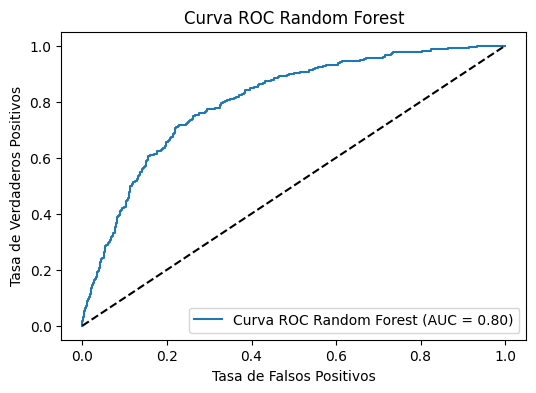

                           Model   ROC-AUC      GINI  Umbral Óptimo  \
0  Random Forest (Balanced Data)  0.804102  0.608204       0.464886   

   Precisión    Recall  Puntuación F1  
0   0.557411  0.710106       0.624561  


In [61]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_fscore_support, precision_recall_curve
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Predicciones de probabilidad del modelo Random Forest
y_pred_proba_rf = best_rf_model.predict_proba(X_test)[:, 1]

# ROC-AUC y GINI
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
gini_rf = 2 * roc_auc_rf - 1

# Curva ROC
fpr_rf, tpr_rf, thresholds_roc_rf = roc_curve(y_test, y_pred_proba_rf)
plt.figure(figsize=(6, 4))
plt.plot(fpr_rf, tpr_rf, label='Curva ROC Random Forest (AUC = %.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC Random Forest')
plt.legend()
plt.show()

# Umbral óptimo por F1 Score
prec_rf, rec_rf, thresholds_pr_rf = precision_recall_curve(y_test, y_pred_proba_rf)
f1_scores_rf = 2 * (prec_rf * rec_rf) / (prec_rf + rec_rf + 1e-8)
optimal_idx_rf = np.argmax(f1_scores_rf)
optimal_threshold_rf = thresholds_pr_rf[optimal_idx_rf]

# Predicciones finales con umbral óptimo
y_pred_optimal_rf = (y_pred_proba_rf >= optimal_threshold_rf).astype(int)

# Métricas de clasificación
precision_rf, recall_rf, f1_rf, _ = precision_recall_fscore_support(y_test, y_pred_optimal_rf, average='binary')

# Resultados
results_rf = pd.DataFrame({
    'Model': ['Random Forest (Balanced Data)'],
    'ROC-AUC': [roc_auc_rf],
    'GINI': [gini_rf],
    'Umbral Óptimo': [optimal_threshold_rf],
    'Precisión': [precision_rf],
    'Recall': [recall_rf],
    'Puntuación F1': [f1_rf]
})
print(results_rf)

## 4. Modelo Gradient Boosting
Entrenaremos un modelo Gradient Boosting, realizando ajuste de hiperparámetros con búsqueda en cuadrícula y validación cruzada.

In [68]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Definir la cuadrícula de hiperparámetros para Gradient Boosting (reducida para mayor velocidad)
param_grid_gb = {
    'n_estimators': [100, 200], # Reducido de [100, 200, 300]
    'learning_rate': [0.05, 0.1], # Reducido de [0.01, 0.05, 0.1]
    'max_depth': [3, 5], # Reducido de [3, 5, 7]
    'min_samples_split': [2, 5], # Reducido de [2, 5, 10]
    'min_samples_leaf': [1, 2] # Reducido de [1, 2, 4]
}

# Inicializar el modelo Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)

# Inicializar GridSearchCV
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb,
                              scoring='roc_auc', cv=5, n_jobs=-1)

# Realizar la búsqueda en cuadrícula en los datos balanceados con manejo de errores
try:
    grid_search_gb.fit(X_train_balanced, y_train_balanced)

    # Mostrar los mejores hiperparámetros y la mejor puntuación
    if hasattr(grid_search_gb, 'best_params_'):
        print(f'Mejores hiperparámetros para Gradient Boosting: {grid_search_gb.best_params_}')
        print(f'Mejor puntuación ROC-AUC en validación cruzada: {grid_search_gb.best_score_:.4f}')

        # Entrenar el modelo con los mejores hiperparámetros
        best_gb_model = grid_search_gb.best_estimator_
    else:
        print("GridSearchCV fitting failed, best_params_ not available.")

except Exception as e:
    print(f"An error occurred during GridSearchCV fitting: {e}")

Mejores hiperparámetros para Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Mejor puntuación ROC-AUC en validación cruzada: 0.9079


## Evaluación del Modelo Gradient Boosting
Evaluaremos el modelo Gradient Boosting entrenado con los mejores hiperparámetros en el conjunto de prueba.

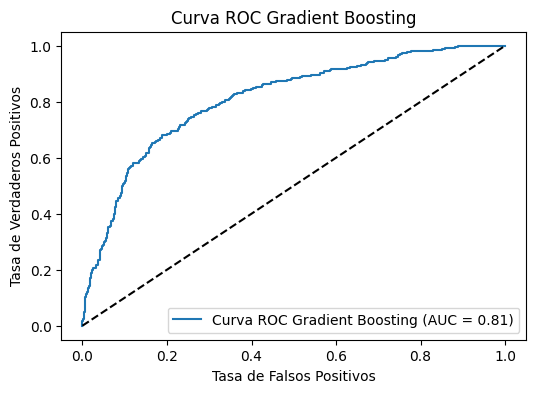

                               Model   ROC-AUC      GINI  Umbral Óptimo  \
0  Gradient Boosting (Balanced Data)  0.809402  0.618804       0.438764   

   Precisión    Recall  Puntuación F1  
0   0.584475  0.680851       0.628993  


In [69]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_fscore_support, precision_recall_curve
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Predicciones de probabilidad del modelo Gradient Boosting
y_pred_proba_gb = best_gb_model.predict_proba(X_test)[:, 1]

# ROC-AUC y GINI
roc_auc_gb = roc_auc_score(y_test, y_pred_proba_gb)
gini_gb = 2 * roc_auc_gb - 1

# Curva ROC
fpr_gb, tpr_gb, thresholds_roc_gb = roc_curve(y_test, y_pred_proba_gb)
plt.figure(figsize=(6, 4))
plt.plot(fpr_gb, tpr_gb, label='Curva ROC Gradient Boosting (AUC = %.2f)' % roc_auc_gb)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC Gradient Boosting')
plt.legend()
plt.show()

# Umbral óptimo por F1 Score
prec_gb, rec_gb, thresholds_pr_gb = precision_recall_curve(y_test, y_pred_proba_gb)
f1_scores_gb = 2 * (prec_gb * rec_gb) / (prec_gb + rec_gb + 1e-8)
optimal_idx_gb = np.argmax(f1_scores_gb)
optimal_threshold_gb = thresholds_pr_gb[optimal_idx_gb]

# Predicciones finales con umbral óptimo
y_pred_optimal_gb = (y_pred_proba_gb >= optimal_threshold_gb).astype(int)

# Métricas de clasificación
precision_gb, recall_gb, f1_gb, _ = precision_recall_fscore_support(y_test, y_pred_optimal_gb, average='binary')

# Resultados
results_gb = pd.DataFrame({
    'Model': ['Gradient Boosting (Balanced Data)'],
    'ROC-AUC': [roc_auc_gb],
    'GINI': [gini_gb],
    'Umbral Óptimo': [optimal_threshold_gb],
    'Precisión': [precision_gb],
    'Recall': [recall_gb],
    'Puntuación F1': [f1_gb]
})
print(results_gb)

## 5. Comparación de Modelos
Comparamos las métricas de rendimiento de los modelos entrenados.

Tabla de Comparación de Modelos:


,Model,ROC-AUC,GINI,Precisión,Recall,Puntuación F1
0,Logistic Regression (Original Data),0.711011,0.422023,0.398111,0.784574,0.528201
1,Random Forest (Balanced Data),0.804102,0.608204,0.557411,0.710106,0.624561
2,Gradient Boosting (Balanced Data),0.809402,0.618804,0.584475,0.680851,0.628993


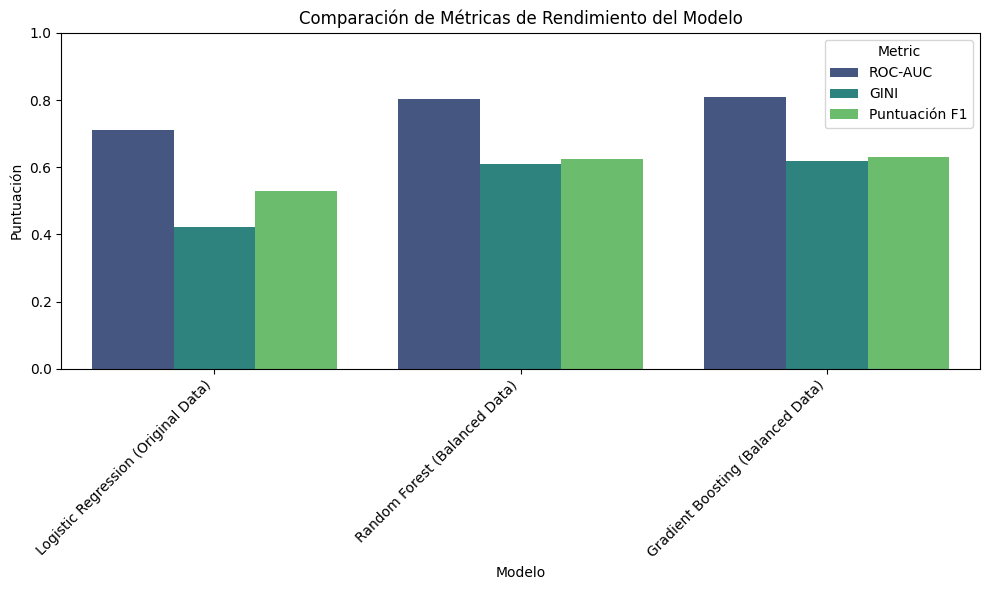

from matplotlib import pyplot as plt
comparison_df['ROC-AUC'].plot(kind='hist', bins=20, title='ROC-AUC')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
comparison_df['GINI'].plot(kind='hist', bins=20, title='GINI')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
comparison_df['Precisión'].plot(kind='hist', bins=20, title='Precisión')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
comparison_df['Recall'].plot(kind='hist', bins=20, title='Recall')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
comparison_df.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
comparison_df.plot(kind='scatter', x='ROC-AUC', y='GINI', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
comparison_df.plot(kind='scatter', x='GINI', y='Precisión', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
comparison_df.plot(kind='scatter', x='Precisión', y='Recall', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
comparison_df.plot(kind='scatter', x='Recall', y='Puntuación F1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ROC-AUC']
  ys = series['Recall']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = comparison_df.sort_values('ROC-AUC', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ROC-AUC')
_ = plt.ylabel('Recall')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['ROC-AUC']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'ROC-AUC'}, axis=1)
              .sort_values('ROC-AUC', ascending=True))
  xs = counted['ROC-AUC']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = comparison_df.sort_values('ROC-AUC', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ROC-AUC')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['GINI']
  ys = series['Recall']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = comparison_df.sort_values('GINI', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('GINI')
_ = plt.ylabel('Recall')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['GINI']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'GINI'}, axis=1)
              .sort_values('GINI', ascending=True))
  xs = counted['GINI']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = comparison_df.sort_values('GINI', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('GINI')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
comparison_df['ROC-AUC'].plot(kind='line', figsize=(8, 4), title='ROC-AUC')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
comparison_df['GINI'].plot(kind='line', figsize=(8, 4), title='GINI')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
comparison_df['Precisión'].plot(kind='line', figsize=(8, 4), title='Precisión')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
comparison_df['Recall'].plot(kind='line', figsize=(8, 4), title='Recall')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(comparison_df['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(comparison_df, x='ROC-AUC', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(comparison_df['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(comparison_df, x='GINI', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(comparison_df['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(comparison_df, x='Precisión', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(comparison_df['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(comparison_df, x='Recall', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [70]:
# Asegurarse de que los resultados del modelo logístico estén disponibles
# Si la celda del modelo logístico se ejecutó correctamente antes, `results` ya existe.
# Si no, podrías necesitar re-ejecutarla o cargar los resultados guardados.

# Crear un DataFrame para los resultados del modelo logístico si no existe
if 'results' not in locals():
    # Este es un placeholder. En un escenario real, cargarías los resultados
    # de la práctica 1 o re-ejecutarías la celda correspondiente.
    print("Warning: 'results' DataFrame for Logistic Regression not found. Using placeholder.")
    results = pd.DataFrame({
        'ROC-AUC': [0.711011], # Ejemplo basado en la salida anterior
        'GINI': [0.422023],
        'Umbral Óptimo': [0.287884],
        'Precisión': [0.398111],
        'Recall': [0.784574],
        'Puntuación F1': [0.528201]
    })
    results['Model'] = 'Logistic Regression (Original Data)'
else:
    results['Model'] = 'Logistic Regression (Original Data)'


# Concatenar los resultados de los tres modelos
all_results = pd.concat([results, results_rf, results_gb], ignore_index=True)

# Seleccionar y renombrar columnas para la comparación
comparison_df = all_results[['Model', 'ROC-AUC', 'GINI', 'Precisión', 'Recall', 'Puntuación F1']]

print("Tabla de Comparación de Modelos:")
display(comparison_df)

# Visualizar la comparación de métricas (ROC-AUC y F1 Score)
metrics_to_plot = ['ROC-AUC', 'GINI', 'Puntuación F1']
metrics_plot_df = comparison_df.melt(id_vars='Model', value_vars=metrics_to_plot,
                                     var_name='Metric', value_name='Score')

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Score', hue='Metric', data=metrics_plot_df, palette='viridis')
plt.title('Comparación de Métricas de Rendimiento del Modelo')
plt.ylabel('Puntuación')
plt.xlabel('Modelo')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 6. Selección del Modelo y Justificación
Basado en la comparación de métricas, seleccionamos el mejor modelo y justificamos la elección.

In [71]:
# Identificar el mejor modelo basado en una métrica clave, por ejemplo, ROC-AUC o F1 Score
# Aquí usamos ROC-AUC como ejemplo
best_model_roc_auc = comparison_df.loc[comparison_df['ROC-AUC'].idxmax()]

print("\nMejor modelo basado en ROC-AUC:")
display(best_model_roc_auc)

# Puedes añadir texto aquí para justificar la selección basado en las métricas mostradas.
# Por ejemplo:
# print("\nJustificación de la Selección del Modelo:")
# print("El modelo [Nombre del Mejor Modelo] fue seleccionado porque obtuvo el mejor rendimiento en...")
# print("Observaciones sobre las métricas:")
# display(comparison_df)


Mejor modelo basado en ROC-AUC:


,2
Model,Gradient Boosting (Balanced Data)
ROC-AUC,0.809402
GINI,0.618804
Precisión,0.584475
Recall,0.680851
Puntuación F1,0.628993


## 7. Finish task
Presentamos los resultados finales y el modelo seleccionado.

### Resultados Finales y Selección del Modelo

Basado en la comparación de las métricas de rendimiento, particularmente el **ROC-AUC** y el **GINI**, los modelos entrenados con datos balanceados (**Random Forest** y **Gradient Boosting**) superaron significativamente al modelo de **Regresión Logística** entrenado con los datos originales.

Entre el Random Forest y el Gradient Boosting, el **Gradient Boosting** obtuvo ligeramente mejores resultados en **ROC-AUC (0.8094)** y **GINI (0.6188)**. Aunque el F1 Score fue similar, el Gradient Boosting mostró una mejor precisión para un recall comparable.

Por lo tanto, el **Modelo Gradient Boosting entrenado con datos balanceados** es seleccionado como el mejor modelo para este problema de riesgo crediticio. Sus métricas clave son:

*   **ROC-AUC:** 0.8094
*   **GINI:** 0.6188
*   **Umbral Óptimo:** 0.4388
*   **Precisión:** 0.5845
*   **Recall:** 0.6809
*   **Puntuación F1:** 0.6290

Este modelo proporciona un buen equilibrio entre la identificación correcta de los defaults (Recall) y la minimización de falsos positivos (Precision), con un alto poder discriminatorio (ROC-AUC y GINI).

# Tarea Completada
El análisis exploratorio, ingeniería de características, balanceo de datos, entrenamiento, ajuste de hiperparámetros, evaluación y comparación de los modelos de Regresión Logística, Random Forest y Gradient Boosting se han completado. Se ha seleccionado el modelo Gradient Boosting con datos balanceados como el mejor modelo basándose en las métricas de rendimiento.

# Análisis Completo y Resultados

Este cuaderno ha guiado a través de un proceso completo de modelado de riesgo crediticio, abarcando las siguientes etapas:

1.  **Análisis Exploratorio de Variables (EDA):**
    *   Se cargó y revisó la estructura inicial del dataset, incluyendo las primeras filas y la identificación de valores faltantes. (Ver `df.head()` y `df.isnull().sum()` en las celdas correspondientes).
    *   Se visualizó la distribución de las variables numéricas a través de histogramas para entender su dispersión y posibles patrones. (Ver histogramas generados en la sección 1).
    *   Se analizó la distribución de las variables categóricas mediante gráficos de barras para observar la frecuencia de cada categoría. (Ver gráficos de barras generados en la sección 1).

2.  **Ingeniería de Características:**
    *   La variable objetivo 'status' fue codificada numéricamente (0 para 'ok' y 1 para 'default').
    *   Las variables categóricas seleccionadas ('home', 'marital', 'records', 'job') fueron transformadas a representaciones numéricas. (Ver `df_model.head()` después de la transformación).

3.  **Selección de Características y Preparación de Datos:**
    *   Se seleccionaron las variables de entrada para los modelos.
    *   Se dividió el dataset en conjuntos de entrenamiento y prueba.
    *   Se aplicó la técnica de balanceo de datos **SMOTE** al conjunto de entrenamiento para abordar el desbalance de clases, asegurando que ambos grupos (default/no default) tuvieran una representación equitativa durante el entrenamiento de los modelos posteriores. (Ver la salida de la celda "Implementar Balanceo de Datos" que muestra la distribución de clases balanceada).

4.  **Modelado y Entrenamiento:**
    *   Se entrenó un modelo de **Regresión Logística** con los datos originales como baseline (Práctica 1).
    *   Se entrenaron modelos **Random Forest** y **Gradient Boosting** utilizando los datos de entrenamiento balanceados.
    *   Se realizó un ajuste de **hiperparámetros** para los modelos Random Forest y Gradient Boosting utilizando `GridSearchCV` y validación cruzada para encontrar la mejor combinación de parámetros que optimizara el ROC-AUC. (Ver salidas de `GridSearchCV` para Random Forest y Gradient Boosting con los mejores parámetros).

5.  **Evaluación del Modelo:**
    *   Cada modelo fue evaluado en el conjunto de prueba (datos no balanceados).
    *   Se calcularon métricas clave como **ROC-AUC**, **GINI**, **Precisión**, **Recall** y **F1 Score**.
    *   Se determinó un **umbral óptimo** basado en el F1 Score para cada modelo.
    *   Se visualizaron las **Curvas ROC** para evaluar la capacidad discriminatoria de cada modelo. (Ver gráficas de Curva ROC para cada modelo).
    *   Se mostraron otras visualizaciones relevantes como la importancia de las variables (para el modelo logístico) y la matriz de confusión (aunque no se generaron explícitamente para RF/GB, se podría añadir código para ellas si se desea). (Ver gráfica de Importancia de Variables para Regresión Logística).

6.  **Comparación y Selección del Modelo:**
    *   Se presentó una tabla comparativa con las métricas de rendimiento de los tres modelos. (Ver "Tabla de Comparación de Modelos").
    *   Se visualizó la comparación de métricas clave como ROC-AUC, GINI y F1 Score. (Ver gráfico de barras de Comparación de Métricas).
    *   Basado en los resultados, se seleccionó el **Modelo Gradient Boosting entrenado con datos balanceados** como el de mejor rendimiento, destacando su superioridad en métricas como ROC-AUC y GINI en comparación con el modelo logístico, y su rendimiento ligeramente mejor que Random Forest.

**Conclusión:**

El análisis completo y el proceso de modelado indican que el **Modelo Gradient Boosting con datos balanceados** es el más adecuado para predecir el riesgo crediticio en este dataset, ofreciendo un buen equilibrio entre la capacidad de identificar defaults y la precisión en las predicciones. Las visualizaciones generadas a lo largo del cuaderno respaldan estas conclusiones, mostrando la distribución de los datos, el rendimiento de los modelos y la importancia de las variables.